In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read in data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Ananya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2018_Top_Songs.csv')
Ananya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2019_Top_Songs.csv')
Ananya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2020_Top_Songs.csv')
Ananya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2021_Top_Songs.csv')
Ananya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2022_Top_Songs.csv')
Ananya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2023_Top_Songs.csv')

Arushi_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2018_Top_Songs.csv')
Arushi_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2019_Top_Songs.csv')
Arushi_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2020_Top_Songs.csv')
Arushi_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2021_Top_Songs.csv')
Arushi_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2022_Top_Songs.csv')
Arushi_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2023_Top_Songs.csv')

Ritika_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2018_Top_Songs.csv')
Ritika_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2019_Top_Songs.csv')
Ritika_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2020_Top_Songs.csv')
Ritika_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2021_Top_Songs.csv')
Ritika_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2022_Top_Songs.csv')
Ritika_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2023_Top_Songs.csv')

Shriya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2018_Top_Songs.csv')
Shriya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2019_Top_Songs.csv')
Shriya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2020_Top_Songs.csv')
Shriya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2021_Top_Songs.csv')
Shriya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2022_Top_Songs.csv')
Shriya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2023_Top_Songs.csv')

In [4]:
ananya_df_concat = pd.concat([Ananya_df_2018, Ananya_df_2019, Ananya_df_2020, Ananya_df_2021, Ananya_df_2022, Ananya_df_2023], ignore_index=True, axis=0)
arushi_df_concat = pd.concat([Arushi_df_2018, Arushi_df_2019, Arushi_df_2020, Arushi_df_2021, Arushi_df_2022, Arushi_df_2023], ignore_index=True, axis=0)
ritika_df_concat = pd.concat([Ritika_df_2018, Ritika_df_2019, Ritika_df_2020, Ritika_df_2021, Ritika_df_2022, Ritika_df_2023], ignore_index=True, axis=0)
shriya_df_concat = pd.concat([Shriya_df_2018, Shriya_df_2019, Shriya_df_2020, Shriya_df_2021, Shriya_df_2022, Shriya_df_2023], ignore_index=True, axis=0)
all_df_concat = pd.concat([ananya_df_concat, arushi_df_concat, ritika_df_concat, shriya_df_concat], ignore_index=True, axis=0)

## Prepare data for machine learning models

### Convert numeric variables to scale of [0,1]

In [5]:
# Funtion also used in "01_Data_Visualization.ipynb"
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [6]:
numeric_cols = ['length',
                'popularity',
                'acousticness',
                'danceability',
                'energy',
                'instrumentalness',
                'liveness',
                'loudness',
                'speechiness',
                'valence',
                'tempo',
                'release_year']

for col in numeric_cols:
    convert_scale(all_df_concat, col)

In [7]:
df_all_adj = all_df_concat.copy()
# df_all_adj

### Onehot encode categorical variables

In [8]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_all_adj[['time_signature', 'mode', 'key']])
onehot = pd.DataFrame(oe_results.toarray(), columns=['time_signature_1', 'time_signature_2',
                                                     'time_signature_3', 'time_signature_4',
                                                     'mode_1', 'mode_2',
                                                     'key_1', 'key_2','key_3','key_4','key_5', 'key_6',
                                                     'key_7', 'key_8','key_9','key_10','key_11', 'key_12'])
df_all_adj = pd.concat([df_all_adj, onehot], axis=1)
# df_all_adj.T

In [9]:
model_feature_cols = ['energy',
    'valence',
    'danceability',
    'liveness',
    'speechiness',
    'instrumentalness',
    'acousticness',
    'loudness',
    'length',
    'popularity',
    'tempo',
    'release_year',
    'time_signature_1',
    'time_signature_2',
    'time_signature_3',
    'time_signature_4',
    'mode_1',
    'mode_2',
    'key_1',
    'key_2',
    'key_3',
    'key_4',
    'key_5',
    'key_6',
    'key_7',
    'key_8',
    'key_9',
    'key_10',
    'key_11']

model_y_cols = ['name',
                'album',
                'artist']

In [10]:
df_all_adj = df_all_adj[model_feature_cols + model_y_cols]

df_all_adj['true_label'] = ['0'] * 600 + ['1'] * 600 + ['2'] * 600 + ['3'] * 600

ananya_df_concat = df_all_adj.iloc[:600]
arushi_df_concat = df_all_adj.iloc[600:1200].reset_index()
ritika_df_concat = df_all_adj.iloc[1200:1800].reset_index()
shriya_df_concat = df_all_adj.iloc[1800:].reset_index()



<ipython-input-10-b5c7882d8c9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_adj['true_label'] = ['0'] * 600 + ['1'] * 600 + ['2'] * 600 + ['3'] * 600


### Remove repeated songs

In [11]:
# remove repeats on individual playlists
def remove_repeats(df):
  rows_old = range(len(df))
  rows_new = []
  skips = []
  for i in range(len(df)):
    for j in range(i+1, len(df)):
      if(df['name'][i] == df['name'][j]) and (df['artist'][i] == df['artist'][j]):
        skips.append(j)
  for row in rows_old:
    if not row in skips:
      rows_new.append(row)
  df = df.iloc[rows_new,:].reset_index(drop=True)
  return df

In [12]:
df_ananya_no_repeats = remove_repeats(ananya_df_concat)
df_arushi_no_repeats = remove_repeats(arushi_df_concat)
df_ritika_no_repeats = remove_repeats(ritika_df_concat)
df_shriya_no_repeats = remove_repeats(shriya_df_concat)

print(len(df_ananya_no_repeats),len(df_arushi_no_repeats),len(df_ritika_no_repeats), len(df_shriya_no_repeats))

474 524 554 570


### Remove songs if they have all categories

In [13]:
def remove_same_songs(df1, df2, df3, df4):
    rows_old_df1 = range(len(df1))
    rows_new_df1 = []

    rows_old_df2 = range(len(df2))
    rows_new_df2 = []

    rows_old_df3 = range(len(df3))
    rows_new_df3 = []

    rows_old_df4 = range(len(df4))
    rows_new_df4 = []

    same_songs_df1 = []
    same_songs_df2 = []
    same_songs_df3 = []
    same_songs_df4 = []

    # Check for duplicates between df1 and df2
    for i in range(len(df1)):
        for j in range(len(df2)):
            if (df1['name'][i] == df2['name'][j]) and (df1['artist'][i] == df2['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df2.append(j)

    # Check for duplicates between df1 and df3
    for i in range(len(df1)):
        for j in range(len(df3)):
            if (df1['name'][i] == df3['name'][j]) and (df1['artist'][i] == df3['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df1 and df4
    for i in range(len(df1)):
        for j in range(len(df4)):
            if (df1['name'][i] == df4['name'][j]) and (df1['artist'][i] == df4['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df2 and df3
    for i in range(len(df2)):
        for j in range(len(df3)):
            if (df2['name'][i] == df3['name'][j]) and (df2['artist'][i] == df3['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df2 and df4
    for i in range(len(df2)):
        for j in range(len(df4)):
            if (df2['name'][i] == df4['name'][j]) and (df2['artist'][i] == df4['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df3 and df4
    for i in range(len(df3)):
        for j in range(len(df4)):
            if (df3['name'][i] == df4['name'][j]) and (df3['artist'][i] == df4['artist'][j]):
                same_songs_df3.append(i)
                same_songs_df4.append(j)

    for row in rows_old_df1:
        if row not in same_songs_df1:
            rows_new_df1.append(row)

    for row in rows_old_df2:
        if row not in same_songs_df2:
            rows_new_df2.append(row)

    for row in rows_old_df3:
        if row not in same_songs_df3:
            rows_new_df3.append(row)

    for row in rows_old_df4:
        if row not in same_songs_df4:
            rows_new_df4.append(row)

    df1_result = df1.iloc[rows_new_df1, :].reset_index(drop=True)
    df2_result = df2.iloc[rows_new_df2, :].reset_index(drop=True)
    df3_result = df3.iloc[rows_new_df3, :].reset_index(drop=True)
    df4_result = df4.iloc[rows_new_df4, :].reset_index(drop=True)

    return df1_result, df2_result, df3_result, df4_result

In [14]:
df_ananya_no_repeats_no_same, df_arushi_no_repeats_no_same, df_ritika_no_repeats_no_same, df_shriya_no_repeats_no_same = remove_same_songs(
    df_ananya_no_repeats,
    df_arushi_no_repeats,
    df_ritika_no_repeats,
    df_shriya_no_repeats
)

print(len(df_ananya_no_repeats_no_same))
print(len(df_arushi_no_repeats_no_same))
print(len(df_ritika_no_repeats_no_same))
print(len(df_shriya_no_repeats_no_same))

286
367
381
425


### Upsample smaller category so number of samples per class size is equal

In [15]:
# upsample adam for same size categories
def add_missing_songs(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = r.choice(df.shape[0], size=n, replace=False)
    new_df = pd.concat([df,  df.iloc[new_samples,:]], ignore_index=True, axis=0)
    return new_df

In [16]:
df_ananya_no_repeats_no_same_up_sampled = add_missing_songs(df_ananya_no_repeats_no_same, 139, 42)
df_arushi_no_repeats_no_same_up_sampled = add_missing_songs(df_arushi_no_repeats_no_same, 58, 42)
df_ritika_no_repeats_no_same_up_sampled = add_missing_songs(df_ritika_no_repeats_no_same, 44, 42)
# df_adam_no_repeats_no_same_up_sampled

In [17]:
def limit_features(df):
    return df[model_feature_cols]

In [18]:
ananya_features = limit_features(df_ananya_no_repeats_no_same_up_sampled)
arushi_features = limit_features(df_arushi_no_repeats_no_same_up_sampled)
ritika_features = limit_features(df_ritika_no_repeats_no_same_up_sampled)
shriya_features = limit_features(df_shriya_no_repeats_no_same)

### Get training and test sets

In [19]:
def get_train_test(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = list(r.choice(df.shape[0], size=n, replace=False))

    train_1 = new_samples[0:336] + new_samples[420:426] #342
    test_1 = new_samples[336:420]

    train_2 = new_samples[0:252] + new_samples[336:420] + new_samples[420:426] #342
    test_2 = new_samples[252:336]

    train_3 = new_samples[0:168] + new_samples[252:420] + new_samples[420:426]  #342
    test_3 = new_samples[168:252]

    train_4 = new_samples[0:84] + new_samples[168:420] + new_samples[420:426] #342
    test_4 = new_samples[84:168]

    train_5 = new_samples[168:420] + new_samples[420:426]  #258
    test_5 = new_samples[0:84]

#     print(new_samples)

    return train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5

In [20]:
train_test = get_train_test(df_ananya_no_repeats_no_same_up_sampled,
                            df_ananya_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5 =\
train_test[0], train_test[1], train_test[2], train_test[3], train_test[4], train_test[5], train_test[6], train_test[7], train_test[8], train_test[9]

In [21]:
train_test_ananya = get_train_test(df_ananya_no_repeats_no_same_up_sampled,
                            df_ananya_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_ananya, test_1_ananya, train_2_ananya, test_2_ananya, train_3_ananya, test_3_ananya, train_4_ananya, test_4_ananya, train_5_ananya, test_5_ananya = train_test_ananya

train_test_arushi = get_train_test(df_arushi_no_repeats_no_same_up_sampled,
                            df_arushi_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_arushi, test_1_arushi, train_2_arushi, test_2_arushi, train_3_arushi, test_3_arushi, train_4_arushi, test_4_arushi, train_5_arushi, test_5_arushi = train_test_arushi

train_test_ritika = get_train_test(df_ritika_no_repeats_no_same_up_sampled,
                            df_ritika_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_ritika, test_1_ritika, train_2_ritika, test_2_ritika, train_3_ritika, test_3_ritika, train_4_ritika, test_4_ritika, train_5_ritika, test_5_ritika = train_test_ritika

train_test_shriya = get_train_test(df_shriya_no_repeats_no_same,
                            df_shriya_no_repeats_no_same.shape[0],
                            42)

train_1_shriya, test_1_shriya, train_2_shriya, test_2_shriya, train_3_shriya, test_3_shriya, train_4_shriya, test_4_shriya, train_5_shriya, test_5_shriya = train_test_shriya

In [22]:
ananya_train_1 = ananya_features.iloc[train_1_ananya,:]
ananya_train_2 = ananya_features.iloc[train_2_ananya,:]
ananya_train_3 = ananya_features.iloc[train_3_ananya,:]
ananya_train_4 = ananya_features.iloc[train_4_ananya,:]
ananya_train_5 = ananya_features.iloc[train_5_ananya,:]

arushi_train_1 = arushi_features.iloc[train_1_arushi,:]
arushi_train_2 = arushi_features.iloc[train_2_arushi,:]
arushi_train_3 = arushi_features.iloc[train_3_arushi,:]
arushi_train_4 = arushi_features.iloc[train_4_arushi,:]
arushi_train_5 = arushi_features.iloc[train_5_arushi,:]

ritika_train_1 = ritika_features.iloc[train_1_ritika,:]
ritika_train_2 = ritika_features.iloc[train_2_ritika,:]
ritika_train_3 = ritika_features.iloc[train_3_ritika,:]
ritika_train_4 = ritika_features.iloc[train_4_ritika,:]
ritika_train_5 = ritika_features.iloc[train_5_ritika,:]

shriya_train_1 = shriya_features.iloc[train_1_shriya,:]
shriya_train_2 = shriya_features.iloc[train_2_shriya,:]
shriya_train_3 = shriya_features.iloc[train_3_shriya,:]
shriya_train_4 = shriya_features.iloc[train_4_shriya,:]
shriya_train_5 = shriya_features.iloc[train_5_shriya,:]

In [23]:
ananya_test_1 = ananya_features.iloc[test_1_ananya,:]
ananya_test_2 = ananya_features.iloc[test_2_ananya,:]
ananya_test_3 = ananya_features.iloc[test_3_ananya,:]
ananya_test_4 = ananya_features.iloc[test_4_ananya,:]
ananya_test_5 = ananya_features.iloc[test_5_ananya,:]

arushi_test_1 = arushi_features.iloc[test_1_arushi,:]
arushi_test_2 = arushi_features.iloc[test_2_arushi,:]
arushi_test_3 = arushi_features.iloc[test_3_arushi,:]
arushi_test_4 = arushi_features.iloc[test_4_arushi,:]
arushi_test_5 = arushi_features.iloc[test_5_arushi,:]

ritika_test_1 = ritika_features.iloc[test_1_ritika,:]
ritika_test_2 = ritika_features.iloc[test_2_ritika,:]
ritika_test_3 = ritika_features.iloc[test_3_ritika,:]
ritika_test_4 = ritika_features.iloc[test_4_ritika,:]
ritika_test_5 = ritika_features.iloc[test_5_ritika,:]

shriya_test_1 = shriya_features.iloc[test_1_shriya,:]
shriya_test_2 = shriya_features.iloc[test_2_shriya,:]
shriya_test_3 = shriya_features.iloc[test_3_shriya,:]
shriya_test_4 = shriya_features.iloc[test_4_shriya,:]
shriya_test_5 = shriya_features.iloc[test_5_shriya,:]

In [24]:
def get_train_and_test(ananya_train, arushi_train, ritika_train, shriya_train, ananya_test, arushi_test, ritika_test, shriya_test):
    train_X = pd.concat([ananya_train, arushi_train, ritika_train, shriya_train])
    test_X = pd.concat([ananya_test, arushi_test, ritika_test, shriya_test])
    train_y = ([0]*len(ananya_train)) + ([1]*len(arushi_train)) + ([2]*len(ritika_train)) + ([3]*len(shriya_train))
    test_y = ([0]*len(ananya_test)) + ([1]*len(arushi_test)) + ([2]*len(ritika_test)) + ([3]*len(shriya_test))
    return train_X, test_X, train_y, test_y

In [25]:
train_X_1, test_X_1, train_y_1, test_y_1 = get_train_and_test(ananya_train_1,
                                                              arushi_train_1,
                                                              ritika_train_1,
                                                              shriya_train_1,
                                                              ananya_test_1,
                                                              arushi_test_1,
                                                              ritika_test_1,
                                                              shriya_test_1)
train_X_2, test_X_2, train_y_2, test_y_2 = get_train_and_test(ananya_train_2,
                                                              arushi_train_2,
                                                              ritika_train_2,
                                                              shriya_train_2,
                                                              ananya_test_2,
                                                              arushi_test_2,
                                                              ritika_test_2,
                                                              shriya_test_2)
train_X_3, test_X_3, train_y_3, test_y_3 = get_train_and_test(ananya_train_3,
                                                              arushi_train_3,
                                                              ritika_train_3,
                                                              shriya_train_3,
                                                              ananya_test_3,
                                                              arushi_test_3,
                                                              ritika_test_3,
                                                              shriya_test_3)
train_X_4, test_X_4, train_y_4, test_y_4 = get_train_and_test(ananya_train_4,
                                                              arushi_train_4,
                                                              ritika_train_4,
                                                              shriya_train_4,
                                                              ananya_test_4,
                                                              arushi_test_4,
                                                              ritika_test_4,
                                                              shriya_test_4)
train_X_5, test_X_5, train_y_5, test_y_5 = get_train_and_test(ananya_train_5,
                                                              arushi_train_5,
                                                              ritika_train_5,
                                                              shriya_train_5,
                                                              ananya_test_5,
                                                              arushi_test_5,
                                                              ritika_test_5,
                                                              shriya_test_5)

### Evaluation functions

In [26]:
def accuracy(conf_matrix):
    # Assuming conf_matrix is a 4x4 confusion matrix
    num_classes = len(conf_matrix)
    total_correct = sum(conf_matrix[i][i] for i in range(num_classes))
    total_predictions = sum(sum(conf_matrix[i]) for i in range(num_classes))
    return total_correct / total_predictions

In [27]:
def precision(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fp)

In [28]:
def recall(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fn)

In [29]:
def specificity(conf_matrix, class_index):
    # Calculate true negatives (TN) for the specified class
    tn = sum(conf_matrix[i][j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix)) if i != class_index and j != class_index)
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tn / (tn + fp)

In [30]:
def f1(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    precision_ = tp / (tp + fp)
    recall_ = tp / (tp + fn)
    return 2 * precision_ * recall_ / (precision_ + recall_)

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_multiclass(title, y_true, y_scores, n_classes, save=False):
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    if save:
        plt.savefig(save, bbox_inches='tight')

    plt.show()

In [32]:
def plot_pr_curve(y_test, y_score, title='', save=False):
    # Assuming you have four classes, adjust the plotting accordingly
    precision, recall, thresholds = [], [], []
    for i in range(4):
        precision_i, recall_i, thresholds_i = precision_recall_curve(y_test[:, i], y_score[:, i])
        precision.append(precision_i)
        recall.append(recall_i)
        thresholds.append(thresholds_i)

    # create precision recall curve
    fig, ax = plt.subplots()

    # Assuming you have four classes, adjust the plotting accordingly
    ax.plot(recall[0], precision[0], color='purple', label='Class 0')
    ax.plot(recall[1], precision[1], color='blue', label='Class 1')
    ax.plot(recall[2], precision[2], color='green', label='Class 2')
    ax.plot(recall[3], precision[3], color='orange', label='Class 3')

    # add axis labels to plot
    ax.set_title(title)  # Add title
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    plt.legend()  # Add legend for each class

    # display plot
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

### Compare predictions to actual

In [33]:
def compare_predictions_Ananya(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[:84]
    test_set.loc[:,'prediction_probability'] = preds_[:84]
    test_set['actual'] = actual[:84]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Arushi(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[84:168]
    test_set.loc[:,'prediction_probability'] = preds_[84:168]
    test_set['actual'] = actual[84:168]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Ritika(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[168:252]
    test_set.loc[:,'prediction_probability'] = preds_[168:252]
    test_set['actual'] = actual[168:252]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Shriya(preds, preds_, actual, test_set, df_X_no_repeats_no_same):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[252:]
    test_set.loc[:,'prediction_probability'] = preds_[252:]
    test_set['actual'] = actual[252:]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    #test_set = test_set.sort_values('prediction', ascending=False).reset_index()
    return test_set

### K-nearest neighbors

In [80]:
kn = KNeighborsClassifier()

In [81]:
# define search space
space = dict()

space['n_neighbors'] = [1,3,5,8,10,15,19,20,21,22,23,24,25,26,27,28,29,30,35,40,45,50]
space['weights'] = ['uniform', 'distance']
space['algorithm'] = ['ball_tree', 'kd_tree', 'brute']
# space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

search = GridSearchCV(kn, space, scoring='accuracy', cv=cv)

# execute search
result = search.fit(X=train_X_4, y=train_y_4)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.43768584356819656
Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 26, 'weights': 'distance'}


In [82]:
kn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=26, weights='distance')

In [83]:
kn.fit(X=train_X_1, y=train_y_1)
preds = kn.predict(X=test_X_1)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_1)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_1)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[55, 12,  8,  9],
       [18, 44,  7, 15],
       [18, 17, 29, 20],
       [22, 19, 19, 24]])

In [84]:
accuracy(conf_matrix)

0.4523809523809524

<Axes: >

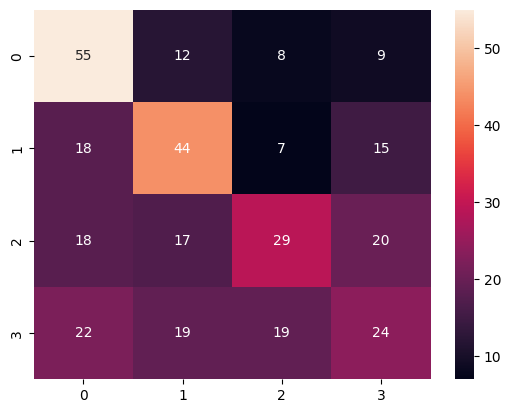

In [85]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [39]:
precision(conf_matrix,0)

0.48672566371681414

In [40]:
recall(conf_matrix,1)

0.5238095238095238

In [41]:
specificity(conf_matrix,2)

0.8650793650793651

In [42]:
f1(conf_matrix,3)

0.31578947368421056

ROC-AUC Score (Class 0): 0.7123015873015873
ROC-AUC Score (Class 1): 0.6666666666666666
ROC-AUC Score (Class 2): 0.6051587301587302
ROC-AUC Score (Class 3): 0.5555555555555555
Macro-average ROC-AUC Score: 0.6349206349206349


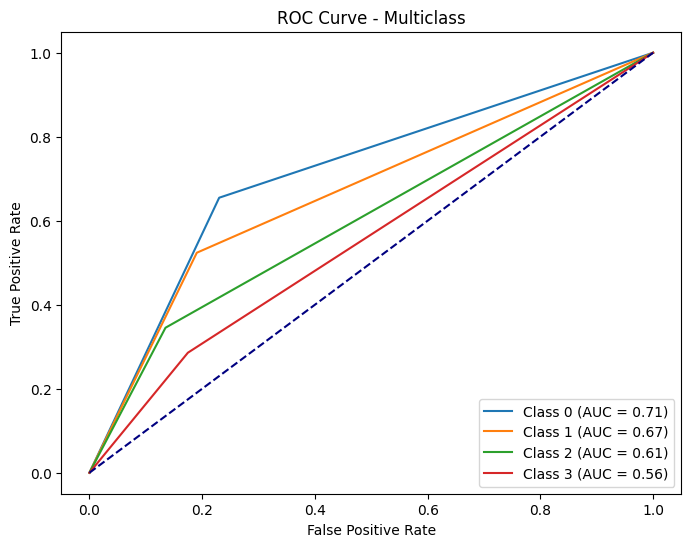

In [43]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4)

Average Precision Score (Class 0): 0.6601903104587135
Average Precision Score (Class 1): 0.5589217181875703
Average Precision Score (Class 2): 0.4839567511205004
Average Precision Score (Class 3): 0.3837474202681799
Macro-average Average Precision Score: 0.521704050008741


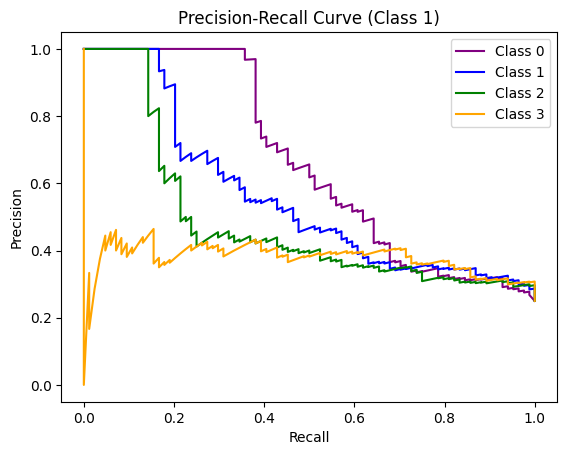

In [44]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [86]:
kn.fit(X=train_X_2, y=train_y_2)
preds = kn.predict(X=test_X_2)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_2)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_2)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[62, 12,  4,  6],
       [31, 26,  8, 19],
       [10, 28, 25, 21],
       [22, 18, 18, 26]])

In [87]:
accuracy(conf_matrix)

0.41369047619047616

<Axes: >

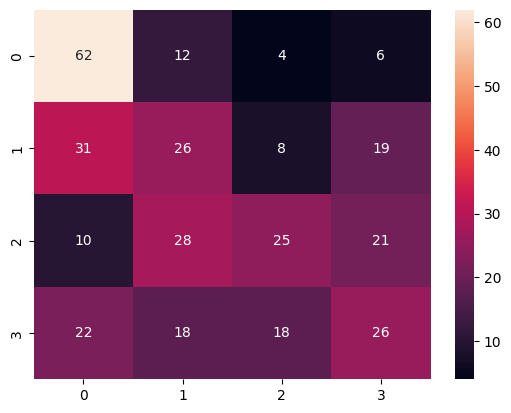

In [88]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [47]:
precision(conf_matrix,0)

0.496

In [48]:
recall(conf_matrix,1)

0.30952380952380953

In [49]:
specificity(conf_matrix,2)

0.8809523809523809

In [50]:
f1(conf_matrix,3)

0.3333333333333333

ROC-AUC Score (Class 0): 0.7440476190476191
ROC-AUC Score (Class 1): 0.5396825396825398
ROC-AUC Score (Class 2): 0.5892857142857143
ROC-AUC Score (Class 3): 0.5634920634920635
Macro-average ROC-AUC Score: 0.6091269841269842


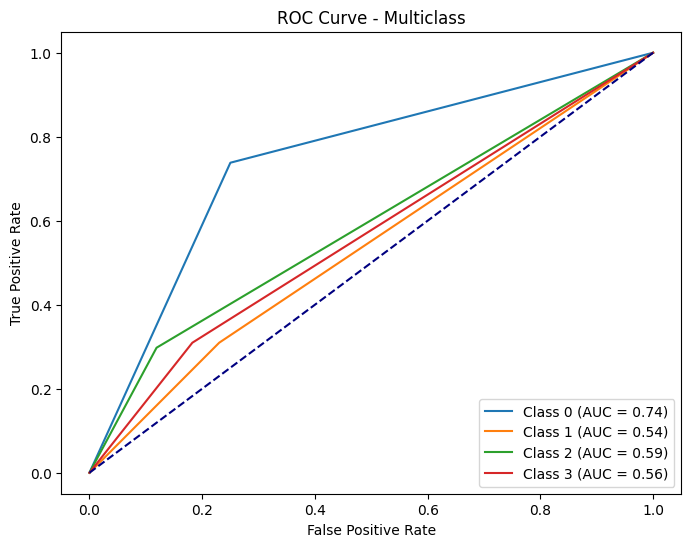

In [52]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass_knn1.png')

Average Precision Score (Class 0): 0.7491100124903057
Average Precision Score (Class 1): 0.44944060910189276
Average Precision Score (Class 2): 0.48127556756416123
Average Precision Score (Class 3): 0.3725406203144437
Macro-average Average Precision Score: 0.5130917023677009


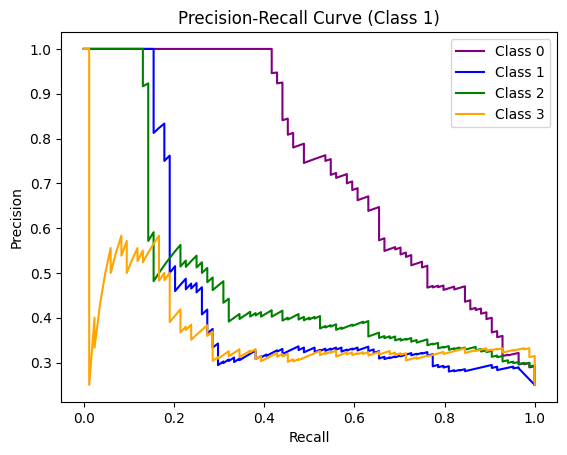

In [53]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [89]:
kn.fit(X=train_X_3, y=train_y_3)
preds = kn.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_3)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_3)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[60,  9,  5, 10],
       [22, 40, 11, 11],
       [16, 16, 31, 21],
       [17, 16, 23, 28]])

In [90]:
accuracy(conf_matrix)

0.4732142857142857

<Axes: >

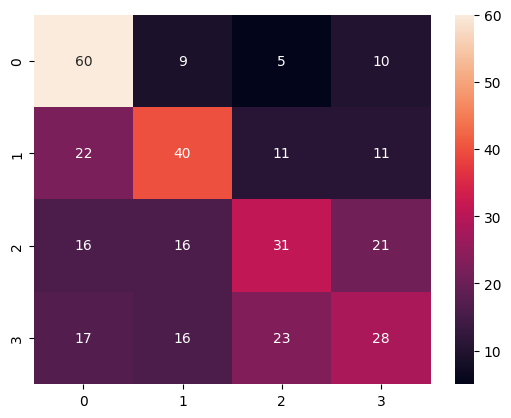

In [91]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [56]:
precision(conf_matrix,0)

0.5217391304347826

In [57]:
recall(conf_matrix,1)

0.47619047619047616

In [58]:
specificity(conf_matrix,2)

0.8452380952380952

In [59]:
f1(conf_matrix,3)

0.3636363636363636

ROC-AUC Score (Class 0): 0.7480158730158731
ROC-AUC Score (Class 1): 0.6567460317460317
ROC-AUC Score (Class 2): 0.6071428571428572
ROC-AUC Score (Class 3): 0.5833333333333334
Macro-average ROC-AUC Score: 0.6488095238095238


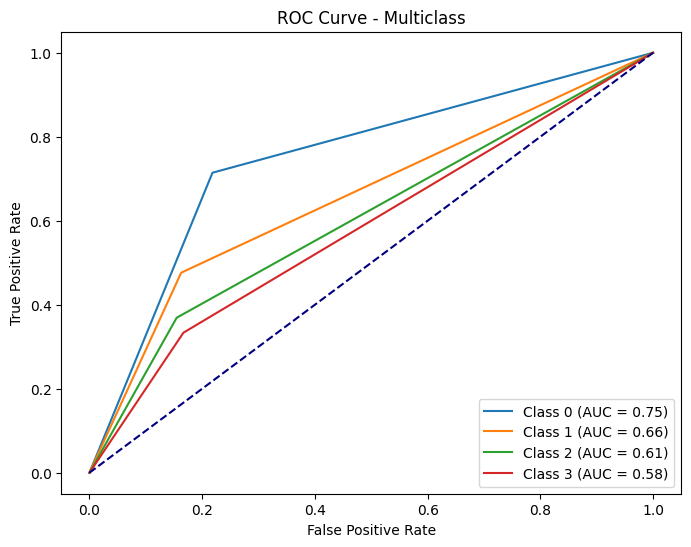

In [60]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4)

Average Precision Score (Class 0): 0.783739269410951
Average Precision Score (Class 1): 0.5748324526352704
Average Precision Score (Class 2): 0.5489878973691587
Average Precision Score (Class 3): 0.4513818184885758
Macro-average Average Precision Score: 0.589735359475989


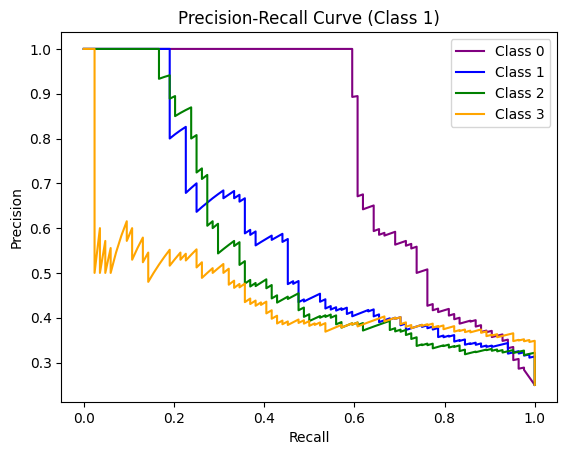

In [61]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [62]:
kn.fit(X=train_X_4, y=train_y_4)
preds = kn.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[63, 11,  2,  8],
       [20, 50,  8,  6],
       [15, 19, 31, 19],
       [24, 10, 18, 32]])

In [63]:
accuracy(conf_matrix)

0.5238095238095238

<Axes: >

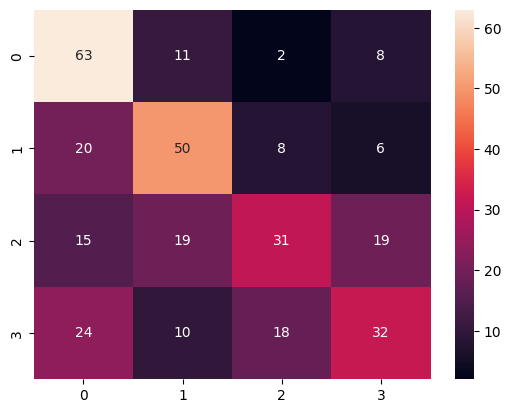

In [64]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [65]:
precision(conf_matrix,0)

0.5163934426229508

In [66]:
recall(conf_matrix,1)

0.5952380952380952

In [67]:
specificity(conf_matrix,2)

0.8888888888888888

In [68]:
f1(conf_matrix,3)

0.42953020134228187

ROC-AUC Score (Class 0): 0.7579365079365079
ROC-AUC Score (Class 1): 0.7182539682539683
ROC-AUC Score (Class 2): 0.628968253968254
ROC-AUC Score (Class 3): 0.625
Macro-average ROC-AUC Score: 0.6825396825396826


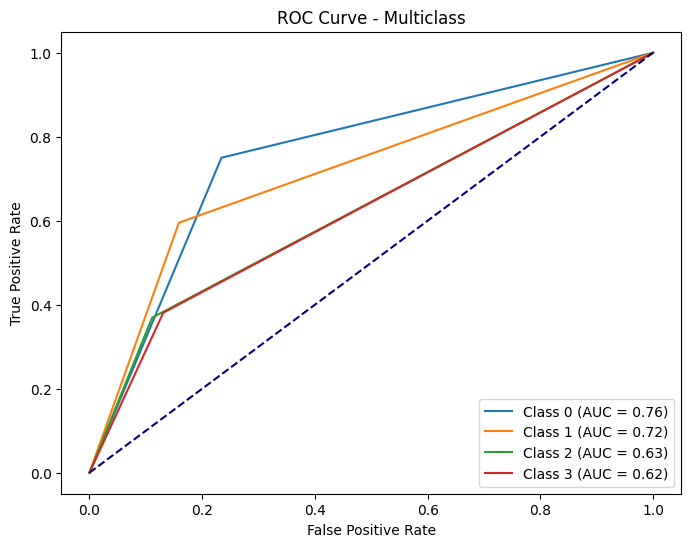

In [69]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4)

Average Precision Score (Class 0): 0.8202763845455286
Average Precision Score (Class 1): 0.6669553324202091
Average Precision Score (Class 2): 0.6019995373978674
Average Precision Score (Class 3): 0.4533790373931539
Macro-average Average Precision Score: 0.6356525729391898


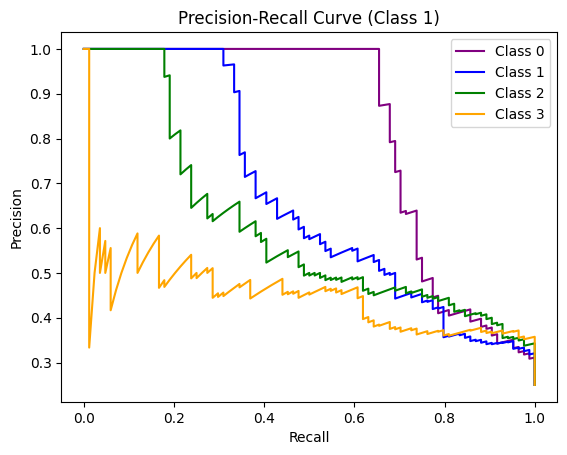

In [70]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [92]:
kn.fit(X=train_X_5, y=train_y_5)
preds = kn.predict(X=test_X_5)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_5)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_5)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[58,  8,  7, 11],
       [21, 28, 15, 20],
       [20, 12, 29, 23],
       [21, 21, 16, 26]])

In [93]:
accuracy(conf_matrix)

0.41964285714285715

<Axes: >

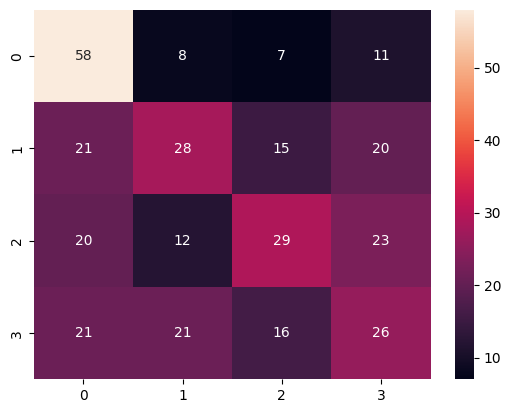

In [94]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [73]:
precision(conf_matrix,0)

0.48333333333333334

In [74]:
recall(conf_matrix,1)

0.3333333333333333

In [75]:
specificity(conf_matrix,2)

0.8492063492063492

In [76]:
f1(conf_matrix,3)

0.3170731707317073

ROC-AUC Score (Class 0): 0.7222222222222222
ROC-AUC Score (Class 1): 0.5853174603174602
ROC-AUC Score (Class 2): 0.5972222222222223
ROC-AUC Score (Class 3): 0.5476190476190477
Macro-average ROC-AUC Score: 0.6130952380952381


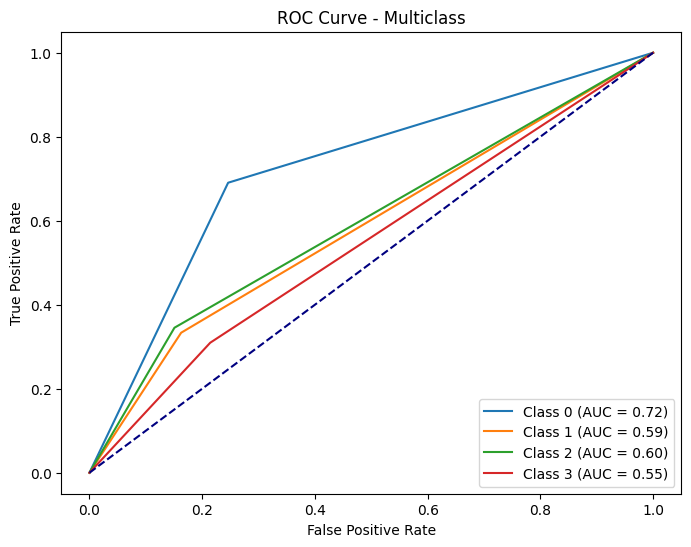

In [77]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4)

Average Precision Score (Class 0): 0.7218533116101501
Average Precision Score (Class 1): 0.5092347569885315
Average Precision Score (Class 2): 0.48274233175719755
Average Precision Score (Class 3): 0.34186284361691077
Macro-average Average Precision Score: 0.5139233109931974


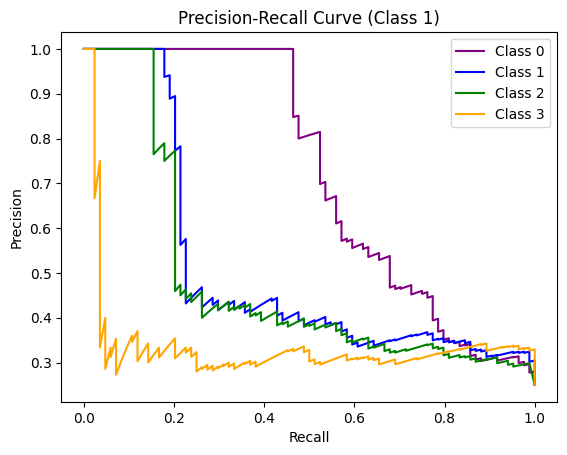

In [78]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
Shriya_predictions = compare_predictions_Shriya(preds, preds_, actual_values, shriya_test_1, df_shriya_no_repeats_no_same) # 4 ke liye kr kyuki uski accuracy sbse jyada hai, 1 ki jagah
Shriya_predictions = Shriya_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]

In [ ]:
#model correct
Shriya_predictions[Shriya_predictions["prediction"]==3].head()


,prediction,prediction_probability,name,artist,album
2,3,0.198789,invisible string,Taylor Swift,folklore (deluxe version)
3,3,0.119810,Forever Winter (Taylor's Version) (From The Va...,Taylor Swift,Red (Taylor's Version)
6,3,0.207672,Hungry Child - Edit,Hot Chip,A Bath Full of Ecstasy
9,3,0.178139,Maniac,Conan Gray,Kid Krow
10,3,0.074559,Airplane pt.2,BTS,Love Yourself 轉 'Tear'
